<a href="https://colab.research.google.com/github/simoneminorr/visualization_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

In [8]:
! git clone https://github.com/ds3001f25/visualization_assignment.git

Cloning into 'visualization_assignment'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (10/10), 1.88 MiB | 12.81 MiB/s, done.


In [9]:
cd visualization_assignment

/content/visualization_assignment/visualization_assignment


**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

1. The user should pass in a Pandas series or Numpy array.

In [73]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#trying to find dataset to use

!ls ./data

college_completion.csv	pretrial_data.csv  VirginiaPretrialData2017Codebook.pdf


In [75]:
#loading pretrial dataset
pretrial = read_csv('./data/pretrial_data.csv')

2. The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.

In [76]:
#guassian kernel

def guassian_kernel(center,bandwidth):
    """ Guassian kernel function. """
    density = np.exp( -(( (grid-center)/bandwidth)**2)/2 ) / (bandwidth * np.sqrt(2*np.pi))
    return density

In [77]:
# uniform

h = 7 # bandwidth

def uniform_kernel(center,bandwidth):
    """ Uniform kernel function. """
    density = ( np.abs( (grid-center)/bandwidth )<=1 )*(.5/h)
    return density

[Text(0.5, 1.0, 'The Bump Function'),
 Text(0.5, 0, 'z'),
 Text(0, 0.5, '$ k(z)$')]

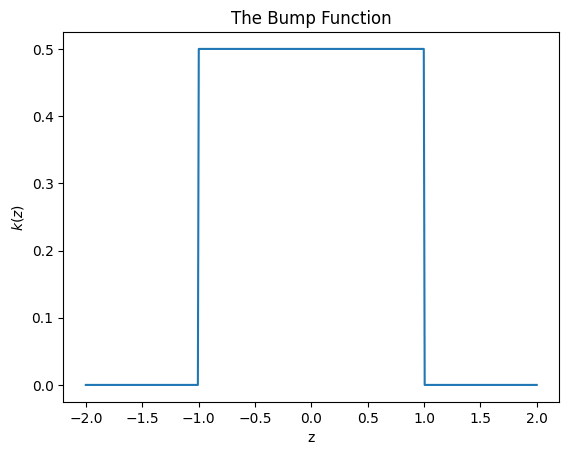

In [78]:
# Epanechinikov Kernel
gr = np.linspace(-2,2,M)
kr = (np.abs(gr) <= 1) * .5
fig = sns.lineplot(x=gr,y=kr) # Bump function
fig.set(title="The Bump Function", xlabel='z', ylabel='$ k(z)$')

In [99]:
#silverman plug in
def silverman_bandwidth(x):
  n = len(x)
  std = np.stf(x, ddof=1)
  return 1.06 * std * n**(-1/5)

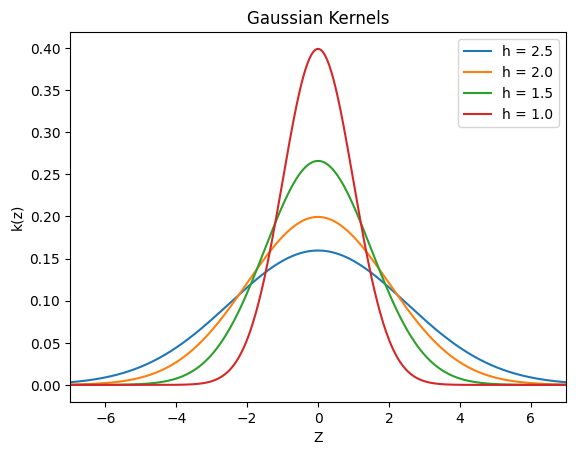

In [80]:
#Gaussian
M = 500 # steps for grid
grid = np.linspace(-7,7,M) # Grid for plotting values

def normal_kernel(center,bandwidth):
    """ Normal kernel function. """
    density = np.exp( -(( (grid-center)/bandwidth)**2)/2 ) / (bandwidth * np.sqrt(2*np.pi))
    return density

## Compute normal kernels around 0 for various bandwidths:
y_10 = normal_kernel(0,1.0)
y_15 = normal_kernel(0,1.5)
y_20 = normal_kernel(0,2.0)
y_25 = normal_kernel(0,2.5)

## Plot kernel functions:
fig = sns.lineplot(x=grid,y=y_25, label='h = 2.5')
fig.set_xlim(-7, 7)
fig.set(title="Gaussian Kernels", xlabel='Z', ylabel='k(z)')
sns.lineplot(x=grid,y=y_20, label='h = 2.0')
sns.lineplot(x=grid,y=y_15, label='h = 1.5')
sns.lineplot(x=grid,y=y_10, label='h = 1.0')
plt.show()

#Source: https://www.aptech.com/blog/the-fundamentals-of-kernel-density-estimation/

[Text(0.5, 1.0, 'The Bump Function'),
 Text(0.5, 0, 'z'),
 Text(0, 0.5, '$ k(z)$')]

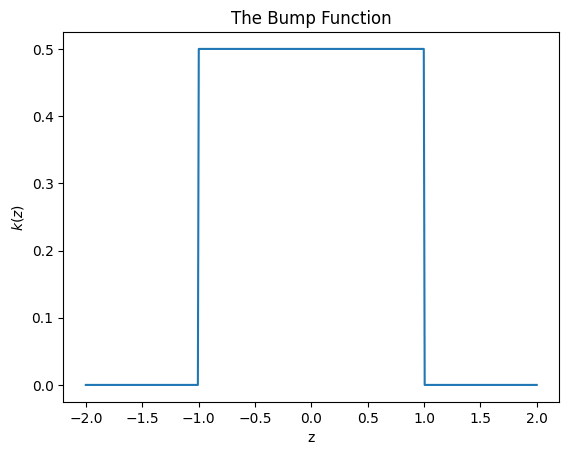

In [81]:
#Epanechnikov
gr = np.linspace(-2,2,M)
kr = (np.abs(gr) <= 1) * .5
fig = sns.lineplot(x=gr,y=kr) # Bump function
fig.set(title="The Bump Function", xlabel='z', ylabel='$ k(z)$')

Use the pretrial data set from class to show that your function works, and compare it with the Seaborn kdeplot.

[Text(0.5, 1.0, 'Kernel Density Plot of Pretrial Sentences'),
 Text(0.5, 0, 'Pretrial Sentences'),
 Text(0, 0.5, 'Density')]

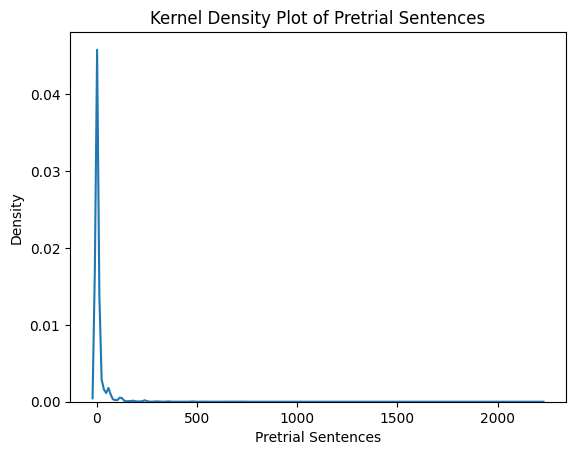

In [96]:
# KDE sns plot using pretrial data

fig=sns.kdeplot(pretrial['sentence'])
fig.set(title="Kernel Density Plot of Pretrial Sentences", xlabel='Pretrial Sentences', ylabel='Density')

[Text(0.5, 1.0, 'Kernel Density Plot of Pretrial Scores'),
 Text(0.5, 0, 'Pretrial Score'),
 Text(0, 0.5, 'Density')]

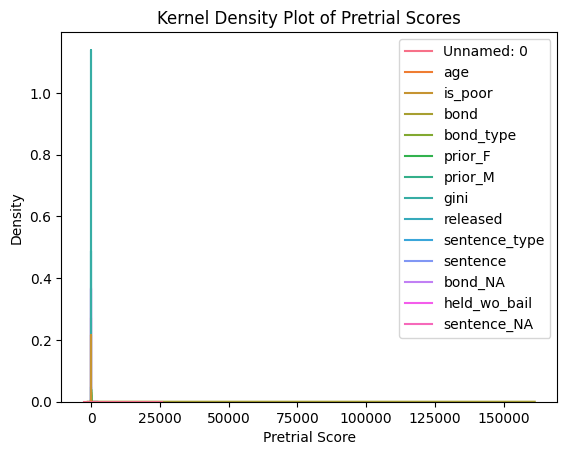

In [97]:
fig = sns.kdeplot(pretrial)
fig.set(title="Kernel Density Plot of Pretrial Scores", xlabel='Pretrial Score', ylabel='Density')

In [87]:
#compiling my codes into one kde function estimator

def kde_plot_function(x,kernel_density="guassian", h=None, gridsize=500, ax=None, label=None):
  x= pd.Series(x).dropna().to_numpy()
  n=len(x)
  if h is None:
      h = silverman_bandwidth(x)
  sd = np.std(x, ddof=1)
  grind = np.linespace(min(x)-2*sd, max(x)+2*sd, gridsize)

  #selecting for kernels using if else
  if kernel_density == "guassian":
    density = guassian_kernel(x,h)
  elif kernel_density == "uniform":
    density = uniform_kernel(x,h)
  elif kernel_density == "epanechnikov":
    density = epanechnikov_kernel(x,h)
  else:
    raise ValueError("Invalid kernel density function")

  #computing KDE
  U = (grid[None, :] - x[:, None]) / h
  if kernel_density == "guassian":
    K = np.exp(-.5 * U ** 2) / np.sqrt(2 * np.pi)
  elif kernel_density == "uniform":
    K = (np.abs(U) <= 1).astype(float) / h
  elif kernel_density == "epanechnikov":
    K = (np.abs(U) <= 1).astype(float) * (3 / 4 - (U ** 2) / 4)
  else:
    raise ValueError("Invalid kernel density function")

  kde_values= K.mean(axis=0)

In [100]:
kde_plot_function(pretrial['sentence'])

(array([-1.01450704e+02, -9.66192378e+01, -9.17877720e+01, -8.69563063e+01,
        -8.21248406e+01, -7.72933748e+01, -7.24619091e+01, -6.76304433e+01,
        -6.27989776e+01, -5.79675118e+01, -5.31360461e+01, -4.83045803e+01,
        -4.34731146e+01, -3.86416488e+01, -3.38101831e+01, -2.89787174e+01,
        -2.41472516e+01, -1.93157859e+01, -1.44843201e+01, -9.65285437e+00,
        -4.82138862e+00,  1.00771237e-02,  4.84154287e+00,  9.67300861e+00,
         1.45044744e+01,  1.93359401e+01,  2.41674059e+01,  2.89988716e+01,
         3.38303373e+01,  3.86618031e+01,  4.34932688e+01,  4.83247346e+01,
         5.31562003e+01,  5.79876661e+01,  6.28191318e+01,  6.76505976e+01,
         7.24820633e+01,  7.73135291e+01,  8.21449948e+01,  8.69764605e+01,
         9.18079263e+01,  9.66393920e+01,  1.01470858e+02,  1.06302324e+02,
         1.11133789e+02,  1.15965255e+02,  1.20796721e+02,  1.25628187e+02,
         1.30459652e+02,  1.35291118e+02,  1.40122584e+02,  1.44954049e+02,
         1.4

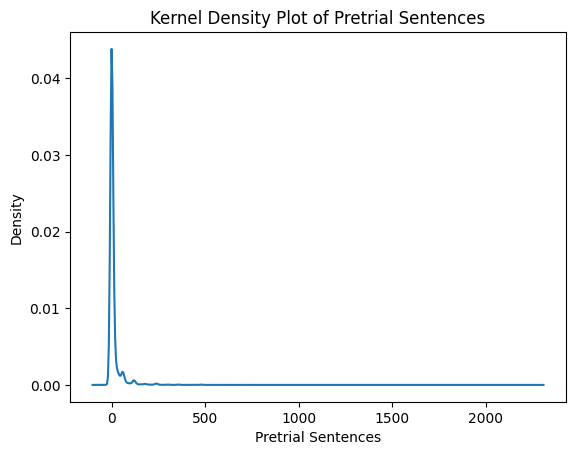

In [103]:
#kde
grid, kde_values = kde_plot_function(pretrial['sentence']) # Unpack the returned tuple
#Source: https://www.geeksforgeeks.org/python/unpacking-a-tuple-in-python/
fig, ax = plt.subplots() # Create a figure and axes
sns.lineplot(x=grid, y=kde_values, ax=ax) # Plot using lineplot on the axes
ax.set(title="Kernel Density Plot of Pretrial Sentences", xlabel='Pretrial Sentences', ylabel='Density') # Set title and labels on the axes
plt.show() # Show the plot

In [104]:
#trying function with pretrial data to make graph

pd.Series(pretrial['sentence']).dropna().to_numpy()
coerce = pd.to_numeric(pretrial['sentence'], errors='coerce')

fig_scratch = kde_plot_function(pretrial['sentence'])

In [105]:
#trying function with pretrial data
fig_scratch = kde_plot_function(pretrial, kernel_density="guassian", h=None, gridsize=500, ax=None, label=None)

TypeError: kde_plot_function() got an unexpected keyword argument 'ax'

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

1. Load the ./data/college_completion.csv data with Pandas.

In [15]:
collegecompletion = read_csv('./data/college_completion.csv')

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

A: Dimensions of the data: (3798, 63)
Number of observations: 3798
Variables included: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer', 'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames', 'cohort_size']

In [16]:
print("Dimensions of the data:", collegecompletion.shape)
print("Number of observations:", collegecompletion.shape[0])
print("Variables included:", collegecompletion.columns.tolist())
display(collegecompletion.head())

Dimensions of the data: (3798, 63)
Number of observations: 3798
Variables included: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate control and level. Describe the patterns you see.

A: There are more private not-for-profit 4 year institutions than the other levels or controls. In addition, overall there are more public instiutions than the private for-profit or not-for-profit schools. There are more public 2-year schools.

In [17]:
pd.crosstab(collegecompletion['control'], collegecompletion['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


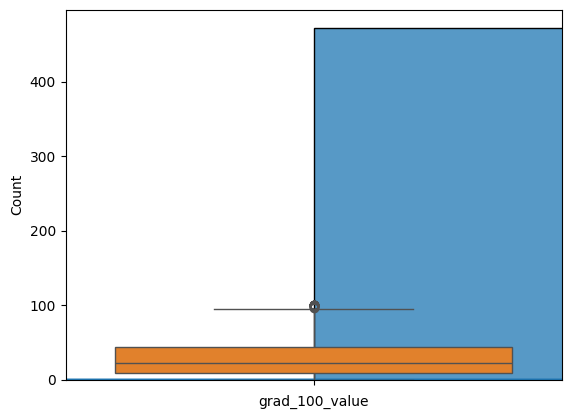

In [24]:
# Convert 'Price' to numeric, coercing errors to NaN
collegecompletion['grad_100_value'] = pd.to_numeric(collegecompletion['grad_100_value'], errors='coerce')

#histogram
sns.histplot(collegecompletion['grad_100_value'])

#kernel density plot
sns.kdeplot(collegecompletion['grad_100_value'])

#boxplot
sns.boxplot(collegecompletion['grad_100_value'])

#output was all the graphs together so in next chunk of code I separated them on to different graphs

#statistical description
collegecompletion['grad_100_value'].describe()

<Axes: xlabel='grad_100_value', ylabel='Count'>

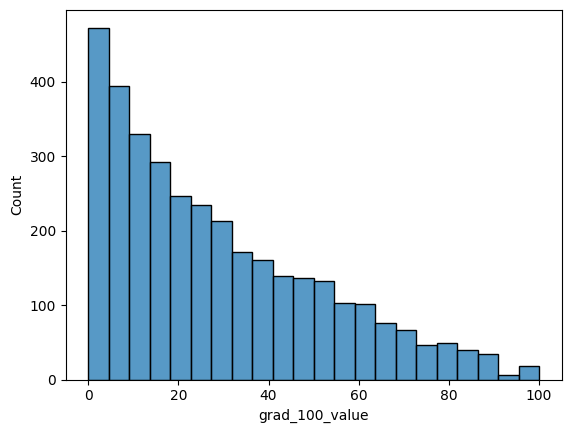

In [25]:
#histogram
sns.histplot(collegecompletion['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

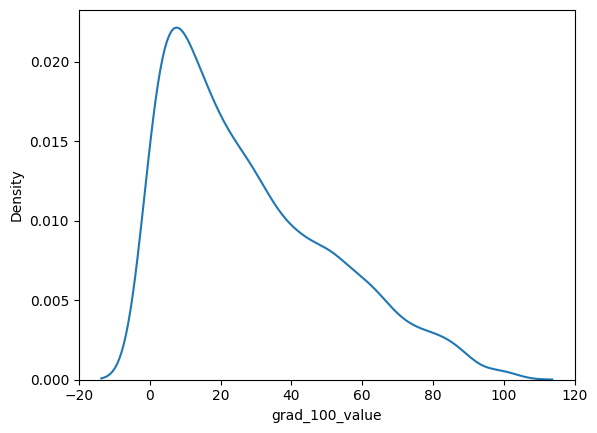

In [26]:
#kernel density plot
sns.kdeplot(collegecompletion['grad_100_value'])

<Axes: ylabel='grad_100_value'>

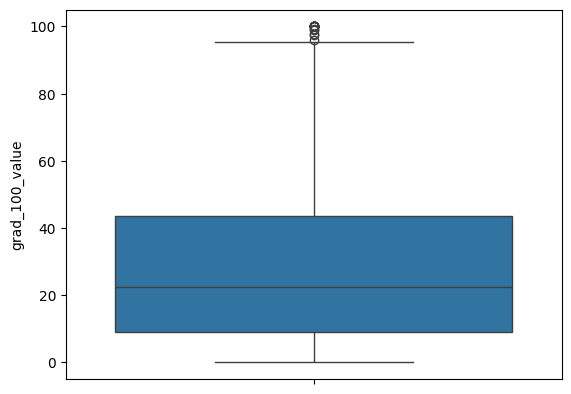

In [27]:
#boxplot
sns.boxplot(collegecompletion['grad_100_value'])

In [28]:
#statistical description
collegecompletion['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

A: Private not-for profit schools have higher graduation rates and overall 4-year schools have higher graduation rates.

Of the 4-year schools, private not-for-profits have higher grad rates and of the 2-year schools, private for-profit schools have higher rates.

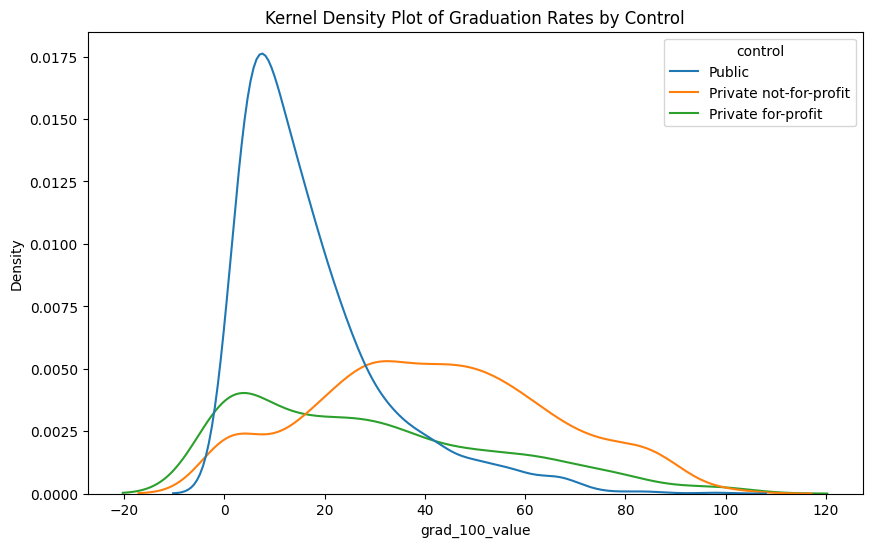

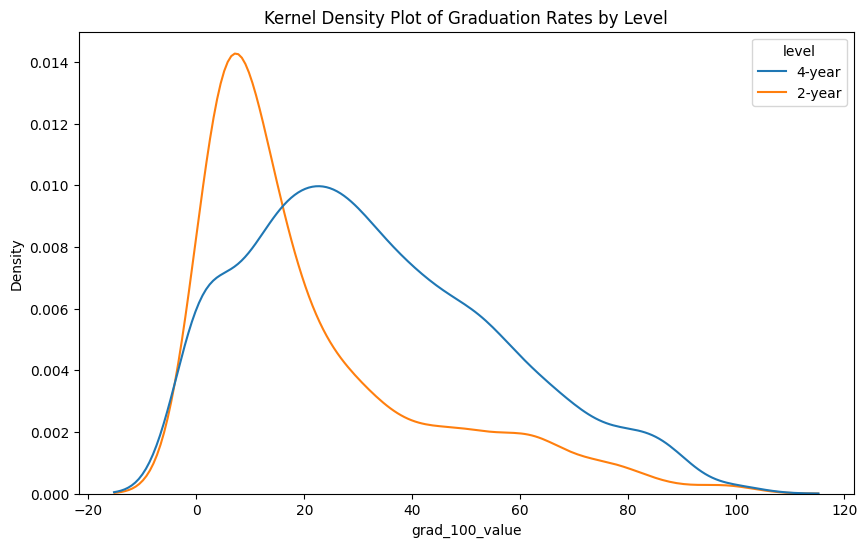

Statistical description of grad_100_value by level:


,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0



Statistical description of grad_100_value by control:


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [29]:
# Grouped kernel density plot by control
plt.figure(figsize=(10, 6))
sns.kdeplot(data=collegecompletion, x='grad_100_value', hue='control')
plt.title("Kernel Density Plot of Graduation Rates by Control")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()

# Grouped kernel density plot by level
plt.figure(figsize=(10, 6))
sns.kdeplot(data=collegecompletion, x='grad_100_value', hue='level')
plt.title("Kernel Density Plot of Graduation Rates by Level")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()

# Grouped statistical descriptions
print("Statistical description of grad_100_value by level:")
display(collegecompletion.groupby('level')['grad_100_value'].describe())

print("\nStatistical description of grad_100_value by control:")
display(collegecompletion.groupby('control')['grad_100_value'].describe())

KeyError: 'hue_name'

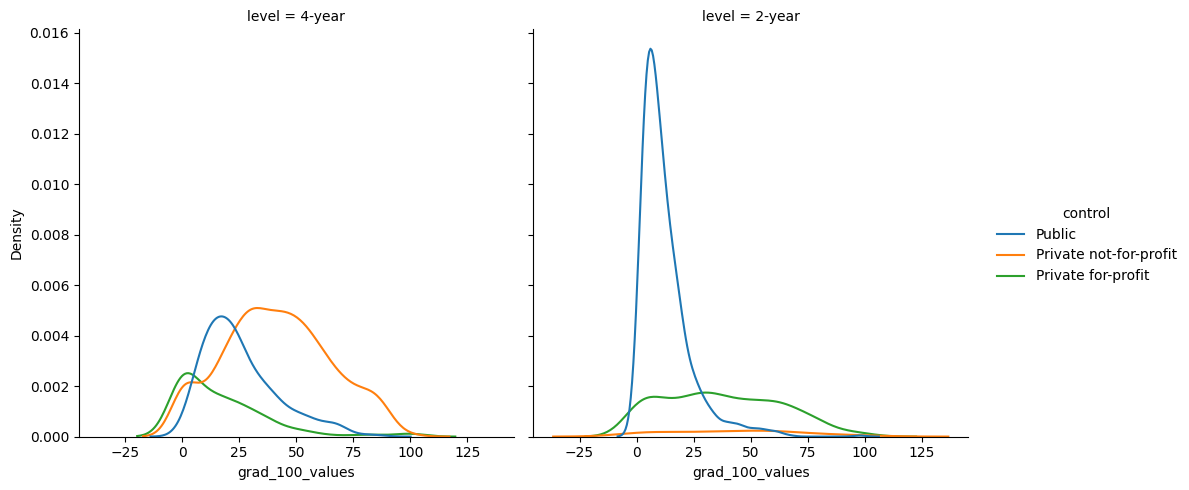

In [32]:
fig = sns.displot(data=collegecompletion, x='grad_100_value', col='level', hue='control', kind='kde')
fig.set_axis_labels("grad_100_values", "Density")
fig.set_titles("Level: {col_name} | Control: {hue_name}")
plt.suptitle("Kernel Density Plot of Graduation Rates by Level and Control", y=1.02)
plt.tight_layout()
plt.show()

#Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.set_titles.html

6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

A: It seems private not-for-profit 4-year institutions have more people graduating at higher rates because the peak is wide representing a higher density and it is spread across the higher graduation completion rates. Public 4-year instiutions and 2-year private for-profit institutions seem to be the next most based on their wide spread across the various graduation precentages.

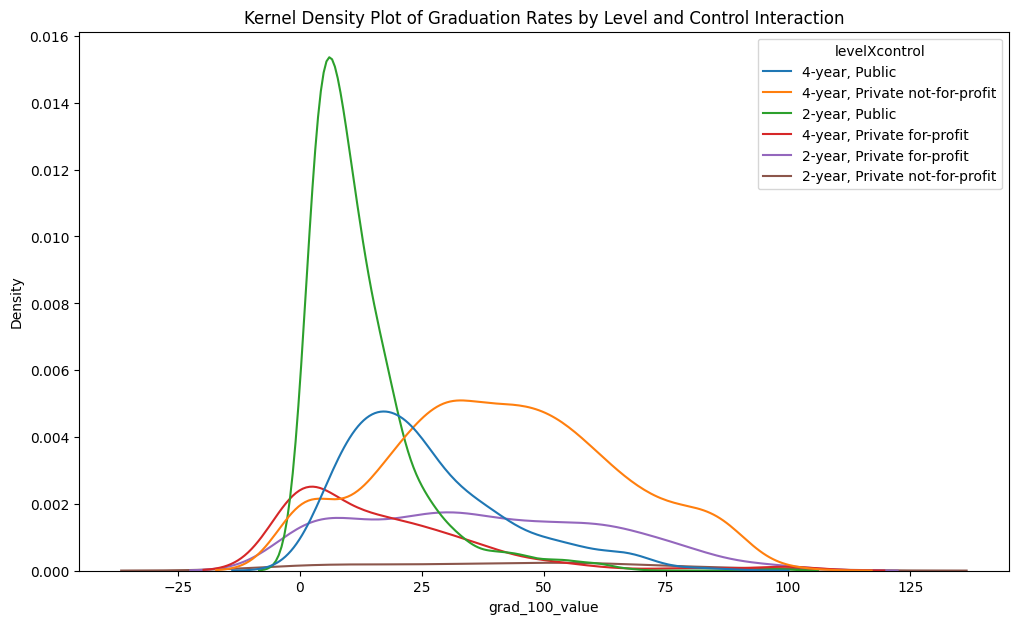

In [33]:
collegecompletion['levelXcontrol'] = collegecompletion['level'] + ', ' + collegecompletion['control']

plt.figure(figsize=(12, 7))
sns.kdeplot(data=collegecompletion, x='grad_100_value', hue='levelXcontrol')
plt.title("Kernel Density Plot of Graduation Rates by Level and Control Interaction")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()

7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

A: The shape of the left most graph shows a wide spread out orange peak which makes sense because they have the highest graduation rates of 4-year instiutions. The right most graph has peaks with vary heights nestled in one another with public being the tallest for the 2-year schools which makes sense because there are far more public 2-year schools compared to the others but overall the graduation rates across all 2-year schools are pretty similar so all the peaks are fairly narrow.

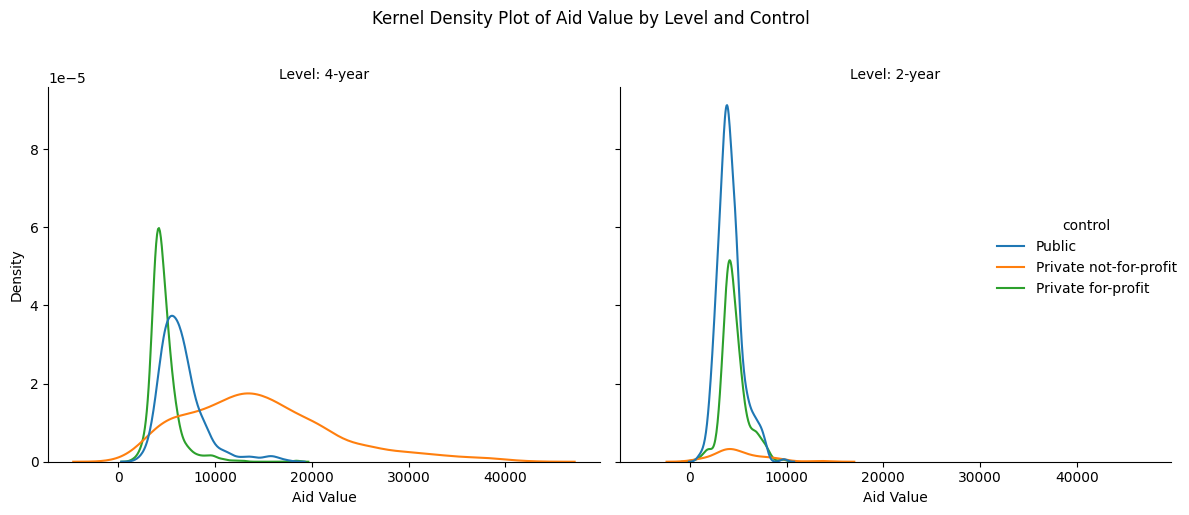

Statistical description of aid_value by level and control:


count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

In [34]:
# Grouped kernel density plot of aid_value by level and control
fig = sns.displot(data=collegecompletion, x='aid_value', col='level', hue='control', kind='kde')
fig.set_axis_labels("Aid Value", "Density")
fig.set_titles("Level: {col_name}")
plt.suptitle("Kernel Density Plot of Aid Value by Level and Control", y=1.02)
plt.tight_layout()
plt.show()

# Grouped statistical descriptions of aid_value by level and control
print("Statistical description of aid_value by level and control:")
display(collegecompletion.groupby(['level', 'control'])['aid_value'].describe())

In [35]:
#Grouped statistical description
print("Statistical description of aid_value by level:")
display(collegecompletion.groupby('level')['aid_value'].describe())

Statistical description of aid_value by level:


,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1458.0,4310.878601,1384.045631,294.0,3485.5,4113.0,4890.0,13654.0
4-year,2339.0,10235.379222,7227.369167,902.0,4830.5,7222.0,14046.0,41580.0


8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

A: 4-year not-for-profit schools' aid seems to increase graduation rates because there are more blue Xs in the top right corner of the graph which means both the aid and graduation rates are the their highest for these institutions.

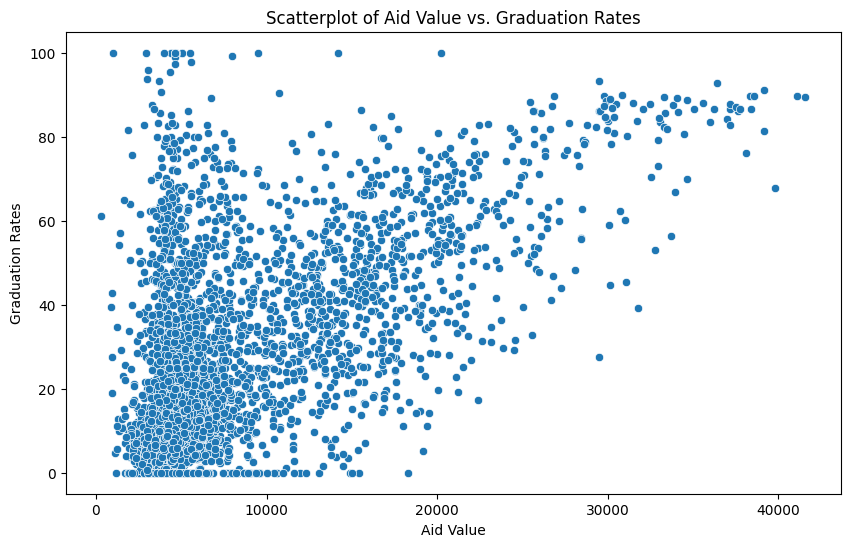

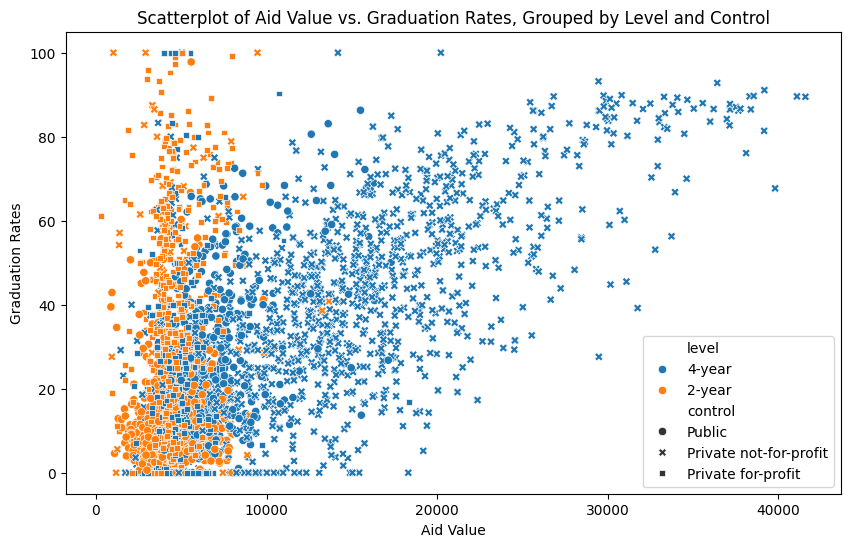

In [36]:
#scatterplot grad by aid
plt.figure(figsize=(10, 6))
sns.scatterplot(data=collegecompletion, x='aid_value', y='grad_100_value')
plt.title("Scatterplot of Aid Value vs. Graduation Rates")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rates")
plt.show()

#scatterplot grouped by level then control
plt.figure(figsize=(10, 6))
sns.scatterplot(data=collegecompletion, x='aid_value', y='grad_100_value', hue='level', style='control')
plt.title("Scatterplot of Aid Value vs. Graduation Rates, Grouped by Level and Control")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rates")
plt.show()